In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [4]:
df = pd.read_csv(filepath_or_buffer='C:/Users/Aditya Oak/Desktop/LinkedIn Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch05/05_01/iris.data.csv',header=None)
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

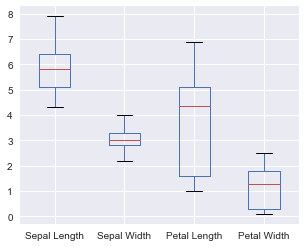

In [5]:
#Identifying outliers from Tukey boxplots

df.boxplot(return_type='dict')
plt.plot()

#The below boxplot shows interquartile range of the 4 features.
# The values lying outside this range are outliers (indicated by small bubbles)

In [6]:
Sepal_Width = X[:,1]    #All rows but only 2nd column i.e. sepal-width
iris_outliers_above = (Sepal_Width > 4)
df[iris_outliers_above]

#Returns all records with Sepal Width > 4

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [7]:
iris_outliers_below = (Sepal_Width < 2.05)
df[iris_outliers_below]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


In [8]:
#Tukey outlier labeling

df.describe()

# For sepal_width, Inter-quartile range (IQR) is the distance between 3rd quartile(75%) and 1st quartile(25%) = 3.3-2.8 = 0.5
# Then, multiply 1.5*IQR = 0.75
# Further, Subtract Q1 from the above value i.e. 2.8-0.75 = 2.05
# We see that the min value i.e 2.0 is less than the above value 2.05 which makes it suspicious as being an outlier in Q1
# Finding outlier in 3rd quartile, do Q3+0.75= 3.3+0.75=4.05
# Similarly, the max value 4.4 is greater than 4.05 which makes it suspicious as being an outlier in Q3
# In conclusion,
# Outlier in Q1 = Q1-1.5*IQR
# Outlier in Q3 = Q3+1.5*IQR

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Multivariate outlier detection
#Use multivariate methods to find the outliers that only show up within combinations of observations from 2 or more different
#variables

In [10]:
import seaborn as sb

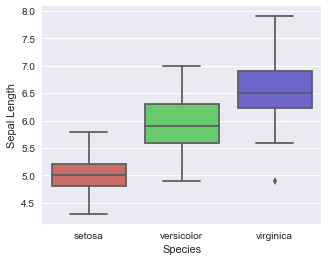

In [11]:
sb.boxplot(x='Species', y='Sepal Length', data=df, palette = 'hls')

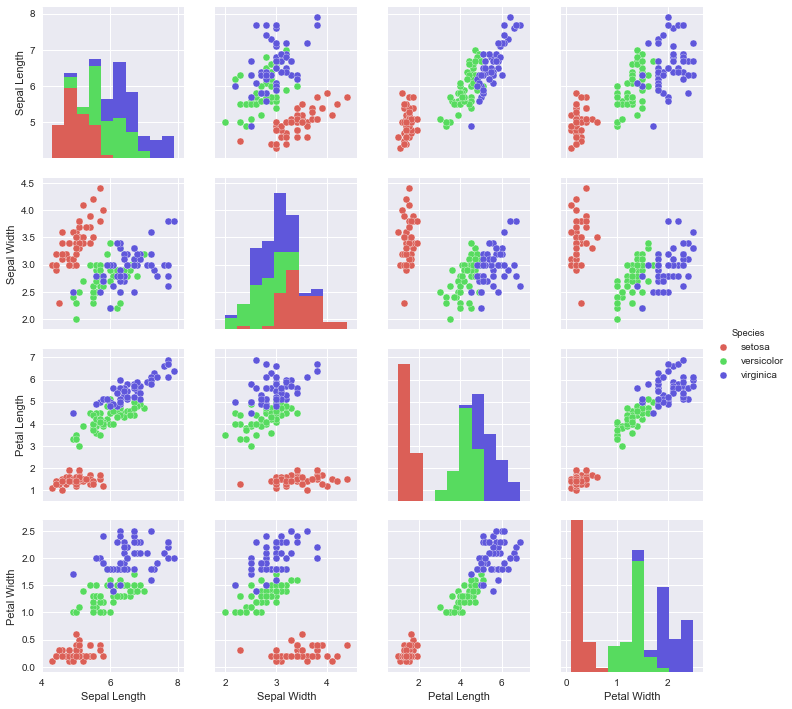

In [12]:
sb.pairplot(df,hue='Species',palette='hls')

In [13]:
#DBSCAN is an unsupervised method that clusters core samples (dense areas of a dataset) and denotes non-core samples
# (sparse portions of the dataset)- adjust parameters accordingly i.e. eps and min_samples. See below

# Used for collective outliers

# Outliers should make up <= 5% of total observations

# Important DBSCAN model parameters:
# 1) eps: The maximum distance between 2 samples for them to be clustered in the same neighborhood (start at eps=0.1)
# 2) min_samples: the min no. of samples in a neighborhood for a data point to qualify as a core point ( start wit a very low 
# sample size)

# Adjust the above 2 parameters until you get <=5 % of total observations as outliers

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter


In [15]:
model = DBSCAN(eps=0.8, min_samples=19).fit(X)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [16]:
#Outliers will be denoted by -1

outliers_df = pd.DataFrame(X)

print (Counter(model.labels_))

print (outliers_df[model.labels_==-1])

#The below result shows the number of records having outliers denoted by -1. The other values are non-outliers. i.e. 1,0
# We see that % of outliers = 6/(94+50+6) = 6/150 = 4% which is well below 5%. 

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


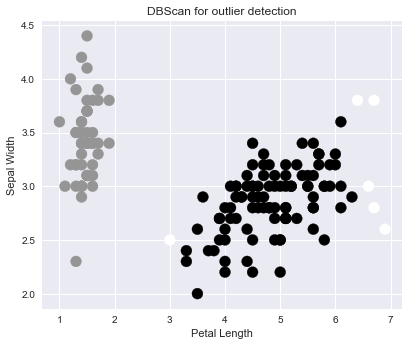

In [17]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(X[:,2],X[:,1],c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for outlier detection')